## Context
- This is image data of Natural Scenes around the world.

## Content
- This Data contains around 25k images of size 150x150 distributed under 6 categories.
- {'buildings' -> 0,
- 'forest' -> 1,
- 'glacier' -> 2,
- 'mountain' -> 3,
- 'sea' -> 4,
- 'street' -> 5 }

- The Train, Test and Prediction data is separated in each zip files. There are around 14k images in Train, 3k in Test and 7k in Prediction.
- This data was initially published on https://datahack.analyticsvidhya.com by Intel to host a Image classification Challenge.

## Acknowledgements
- Thanks to https://datahack.analyticsvidhya.com for the challenge and Intel for the Data
- Photo by Jan Böttinger on Unsplash

## Inspiration
 - Want to build powerful Neural network that can classify these images with more accuracy.

### Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
pwd

'/Users/admin/Desktop/python/Portfolio/CNN_ConvolutionalNeuralNetworks /Intel Image Classification'

In [4]:
import zipfile

- with zipfile.ZipFile("resources/intel.zip", mode="r") as zipp:
 - zipp.extractall("resources")

In [5]:
pwd

'/Users/admin/Desktop/python/Portfolio/CNN_ConvolutionalNeuralNetworks /Intel Image Classification'

In [6]:
data_dir = "/Volumes/External_HD/Data/Kaggle/images/intel_images"

In [7]:
os.listdir(data_dir)

['.DS_Store', 'seg_pred', 'seg_test', 'seg_train']

### Train and test directories

In [8]:
train_dir = data_dir+'/seg_train/seg_train'

In [9]:
os.listdir(train_dir)

['.DS_Store', 'buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [10]:
test_dir = data_dir+"/seg_test/seg_test"

In [11]:
os.listdir(test_dir)

['.DS_Store', 'buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

### Taking a look at a sample image
- since each iamge is 150x150x3 we do not need to alter the image shape

In [12]:
from matplotlib.image import imread

In [13]:
os.listdir(train_dir+"/"+"buildings")[0]

'0.jpg'

In [14]:
sample_image = imread(train_dir+"/"+"buildings"+"/0.jpg")

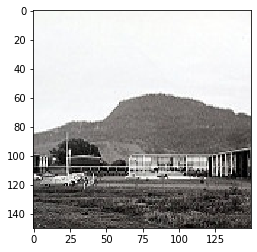

In [15]:
plt.imshow(sample_image)

### Network Shape

In [16]:
network_shape = (150,150,3)

### Image Generator

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
img_gen = ImageDataGenerator(
 rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.5,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255,
)

### Testing generator on sample image

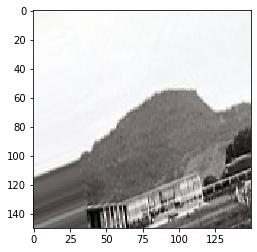

In [19]:
plt.imshow(img_gen.random_transform(sample_image))

### Ceating the network

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D, Conv2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
img_gen.flow_from_directory(train_dir)

Found 14034 images belonging to 6 classes.


## Early stopping
- pRevent overfitting of our model 

In [22]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=4)

In [23]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = network_shape,
                strides = (1,1), padding = "valid", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = network_shape,
                strides = (1,1), padding = "valid", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = network_shape,
                strides = (1,1), padding = "valid", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 6, activation= "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam")

### Generator for train and test set

In [24]:
train_gen = img_gen.flow_from_directory?

In [ ]:
train_gen = img_gen.flow_from_directory

In [25]:
train_gen = img_gen.flow_from_directory

In [26]:
train_gen = img_gen.flow_from_directory(
     train_dir,
    target_size= network_shape[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=6,
)

Found 14034 images belonging to 6 classes.


In [27]:
test_gen = img_gen.flow_from_directory(
     test_dir,
    target_size= network_shape[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=6,
    shuffle=False
)

Found 3000 images belonging to 6 classes.


### Fitting the model

In [29]:
results = model.fit_generator(train_gen, validation_data=test_gen, epochs=10, callbacks=[stop])

Epoch 1/10
2339/2339 [==============================] - 703s 301ms/step - loss: 1.2704 - val_loss: 1.2283
Epoch 2/10
2339/2339 [==============================] - 698s 299ms/step - loss: 1.0976 - val_loss: 1.0303
Epoch 3/10
2339/2339 [==============================] - 708s 303ms/step - loss: 1.0347 - val_loss: 0.9659
Epoch 4/10
2339/2339 [==============================] - 706s 302ms/step - loss: 0.9594 - val_loss: 0.9766
Epoch 5/10
2339/2339 [==============================] - 695s 297ms/step - loss: 0.9276 - val_loss: 0.9220
Epoch 6/10
2339/2339 [==============================] - 687s 294ms/step - loss: 0.9040 - val_loss: 1.0365
Epoch 7/10
2339/2339 [==============================] - 685s 293ms/step - loss: 0.8948 - val_loss: 0.8540
Epoch 8/10
2339/2339 [==============================] - 685s 293ms/step - loss: 0.8656 - val_loss: 0.8552
Epoch 9/10
2339/2339 [==============================] - 686s 293ms/step - loss: 0.8568 - val_loss: 0.9350
Epoch 10/10
2339/2339 [=======================

In [28]:
pd.DataFrame(results.history).plot()

NameError: name 'results' is not defined

### Importing Model

In [29]:
from tensorflow.keras.models import load_model

In [30]:
model = load_model("intel.h5")

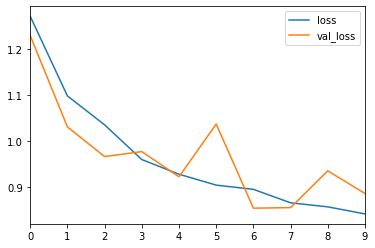

In [31]:
pd.read_csv("model_history.csv", index_col="Unnamed: 0").plot()

In [ ]:
results= model.predict_generator(test_gen)

In [31]:
pred = results.model.predict_generator(test_gen)

NameError: name 'results' is not defined

In [36]:
predic = pred > 0.5

In [37]:
predic

array([[ True, False, False, False, False, False],
       [False, False, False, False, False,  True],
       [ True, False, False, False, False, False],
       ...,
       [False, False, False,  True, False, False],
       [ True, False, False, False, False, False],
       [False, False, False, False, False,  True]])

In [46]:
pred.shape

(3000, 6)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score

In [48]:
print(classification_report(test_gen.classes, pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets